In [2]:
import sys
import os
import pandas as pd 
import pytest


project_root = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.append(project_root)
from practicas import P3


### Testeo de las librerias 

In [3]:


def test_check_data_completeness():
    df = pd.DataFrame({
        'edad': [20, 30, 40, None],
        'sexo': ['M', 'F', None, 'M'],
        'altura': [1.60, 1.75, 1.80, 1.65]
    })

    resumen = P3.check_data_completeness_nombrecompleto(df)

    assert isinstance(resumen, pd.DataFrame)
    assert 'num_nulos' in resumen.columns
    assert resumen.loc['edad', 'num_nulos'] == 1
    assert resumen.loc['sexo', 'num_nulos'] == 1
    assert resumen.loc['altura', 'num_nulos'] == 0
    assert resumen.loc['edad', 'completitud_%'] == 75.0

test_check_data_completeness()
print("Test ejecutado correctamente ")


Test ejecutado correctamente 


In [4]:
def test_calcular_IQR():
    df = pd.DataFrame({'valores': [10, 12, 14, 15, 18, 20, 22, 100]})
    limite_inf, limite_sup = P3.calcular_IQR(df, 'valores')

    print(f"Limite inferior: {limite_inf:.3f}")
    print(f"Limite superior: {limite_sup:.3f}")

 
    tolerancia = 0.01 
    if abs(limite_inf - 1.875) < tolerancia and abs(limite_sup - 32.625) < tolerancia:
        print("Límites correctos ")
    else:
        print("Límites INCORRECTOS ")

    # Detectar outliers
    outliers = df[(df['valores'] < limite_inf) | (df['valores'] > limite_sup)]
    print("Outliers detectados:", outliers['valores'].tolist())
    
    if outliers['valores'].tolist() == [100]:
        print("Outliers correctos ")
    else:
        print("Outliers INCORRECTOS ")

# Ejecutar prueba
test_calcular_IQR()




Limite inferior: 3.000
Limite superior: 31.000
Límites INCORRECTOS 
Outliers detectados: [100]
Outliers correctos 


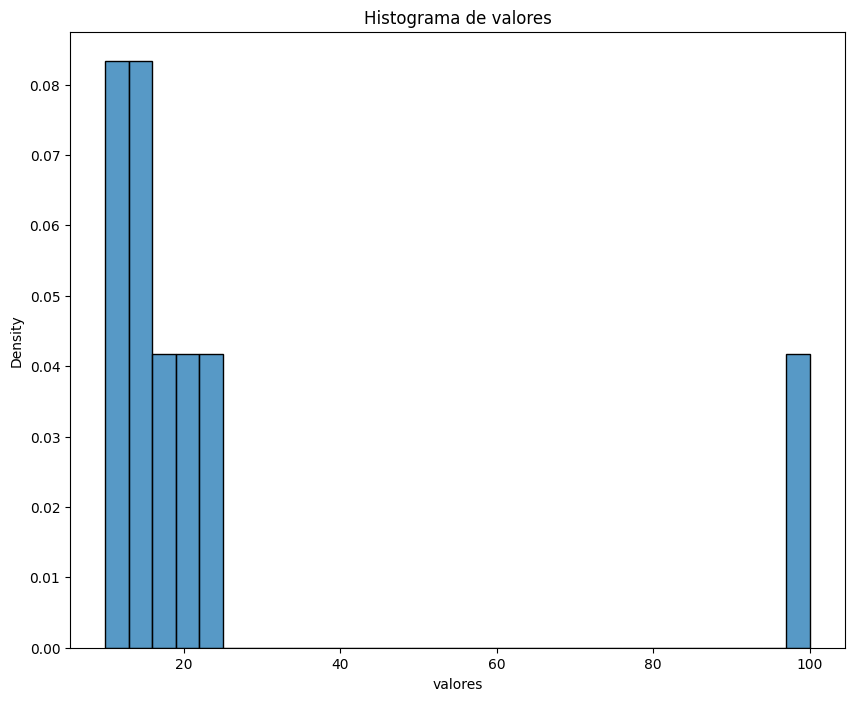

Histograma simple ejecutado correctamente 


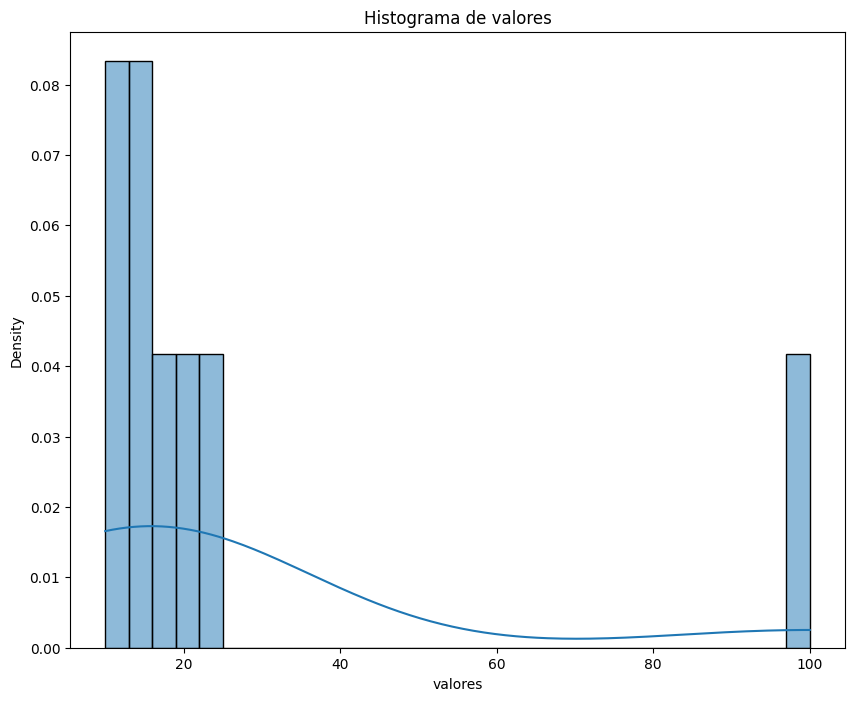

Histograma con KDE ejecutado correctamente 


In [5]:


def test_plot_histogram():

    df = pd.DataFrame({
        'valores': [10, 12, 14, 15, 18, 20, 22, 100],
        'grupo': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B']
    })
    

    try:
        P3.plot_histogram(df, 'valores', kde=False)
        print("Histograma simple ejecutado correctamente ")
    except Exception as e:
        print("Error en histograma simple :", e)

    try:
        P3.plot_histogram(df, 'valores', kde=True)
        print("Histograma con KDE ejecutado correctamente ")
    except Exception as e:
        print("Error en histograma con KDE :", e)

 


test_plot_histogram()


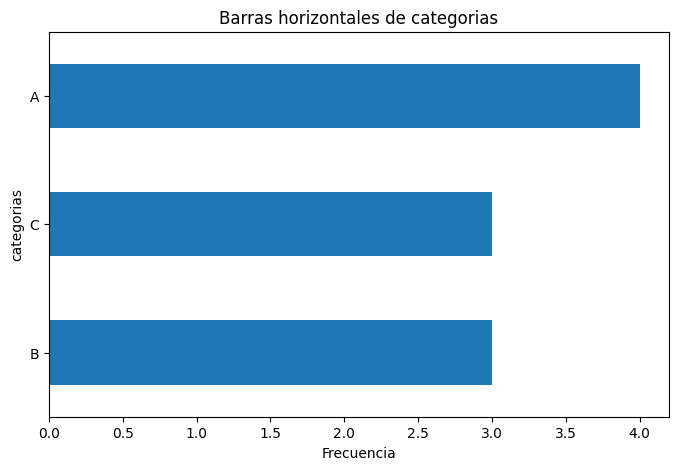

Gráfico de barras horizontales ejecutado correctamente 


In [6]:


def test_plot_horizontal_bar():
  
    df = pd.DataFrame({
        'categorias': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A']
    })
    

    try:
        P3.plot_horizontal_bar(df, 'categorias')
        print("Gráfico de barras horizontales ejecutado correctamente ")
    except Exception as e:
        print("Error al ejecutar gráfico de barras horizontales :", e)


test_plot_horizontal_bar()


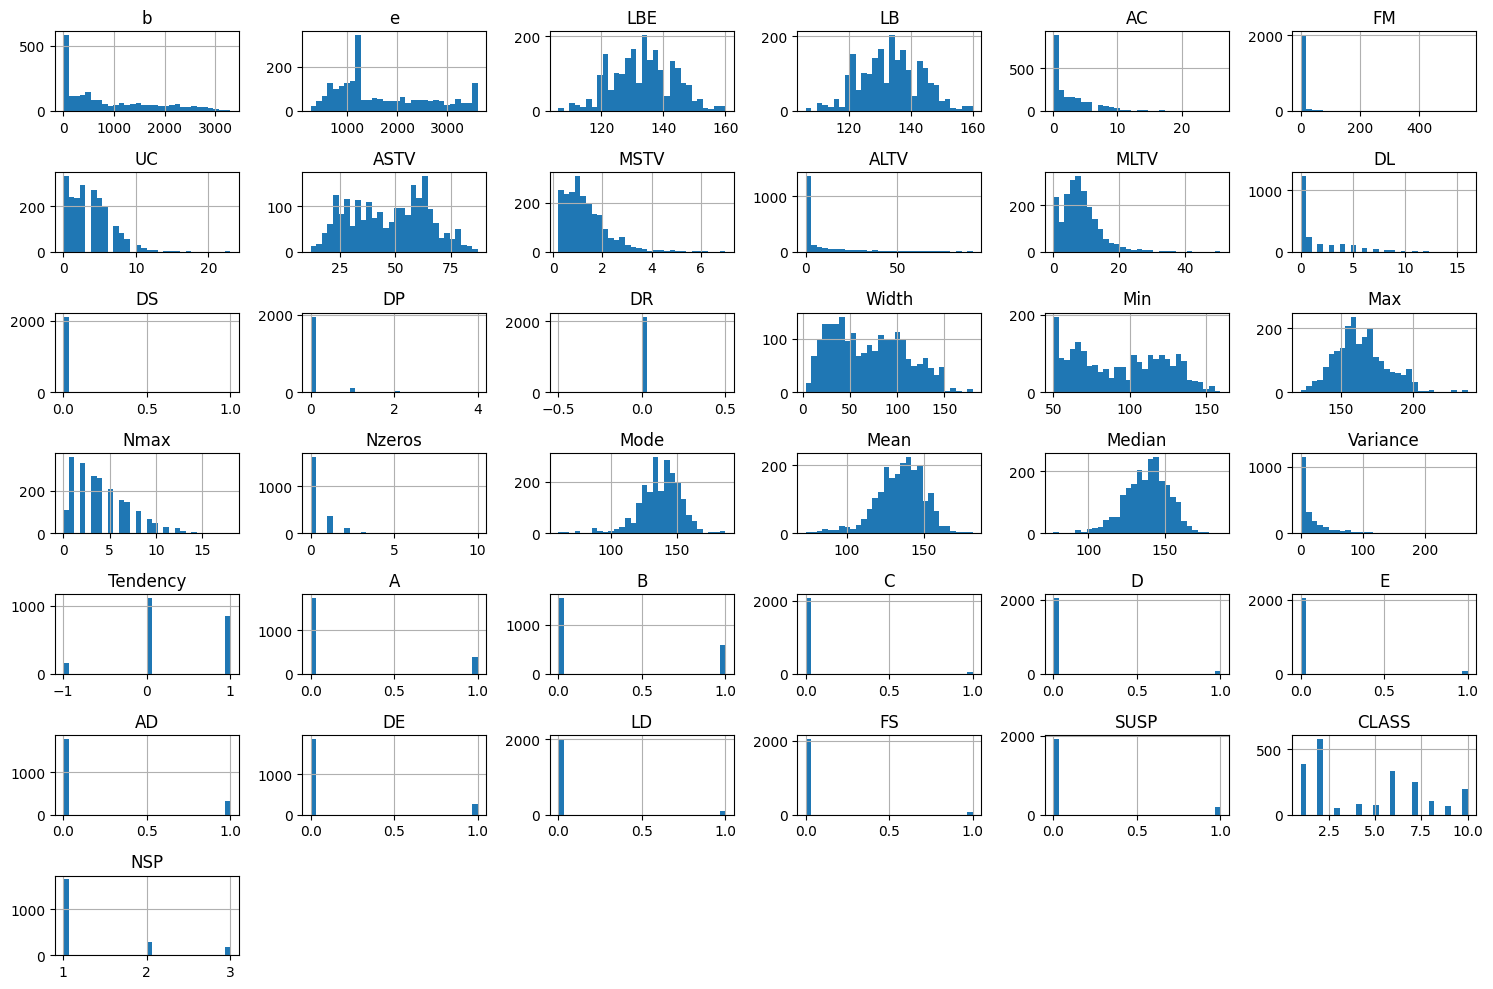


Distribución de FM:
FM
0.0      1311
1.0       208
2.0       119
3.0        85
4.0        65
         ... 
28.0        1
290.0       1
39.0        1
70.0        1
49.0        1
Name: count, Length: 96, dtype: int64

Distribución de DS:
DS
0.0    2120
1.0       8
Name: count, dtype: int64

Distribución de DP:
DP
0.0    1949
1.0     109
2.0      49
3.0      19
4.0       2
Name: count, dtype: int64

Distribución de DR:
DR
0.0    2128
Name: count, dtype: int64

Distribución de C:
C
0.0    2073
1.0      53
Name: count, dtype: int64

Distribución de D:
D
0.0    2045
1.0      81
Name: count, dtype: int64

Distribución de E:
E
0.0    2054
1.0      72
Name: count, dtype: int64

Distribución de AD:
AD
0.0    1794
1.0     332
Name: count, dtype: int64

Distribución de LD:
LD
0.0    2019
1.0     107
Name: count, dtype: int64

Distribución de FS:
FS
0.0    2057
1.0      69
Name: count, dtype: int64

Distribución de SUSP:
SUSP
0.0    1929
1.0     197
Name: count, dtype: int64
Las columnas a elimina

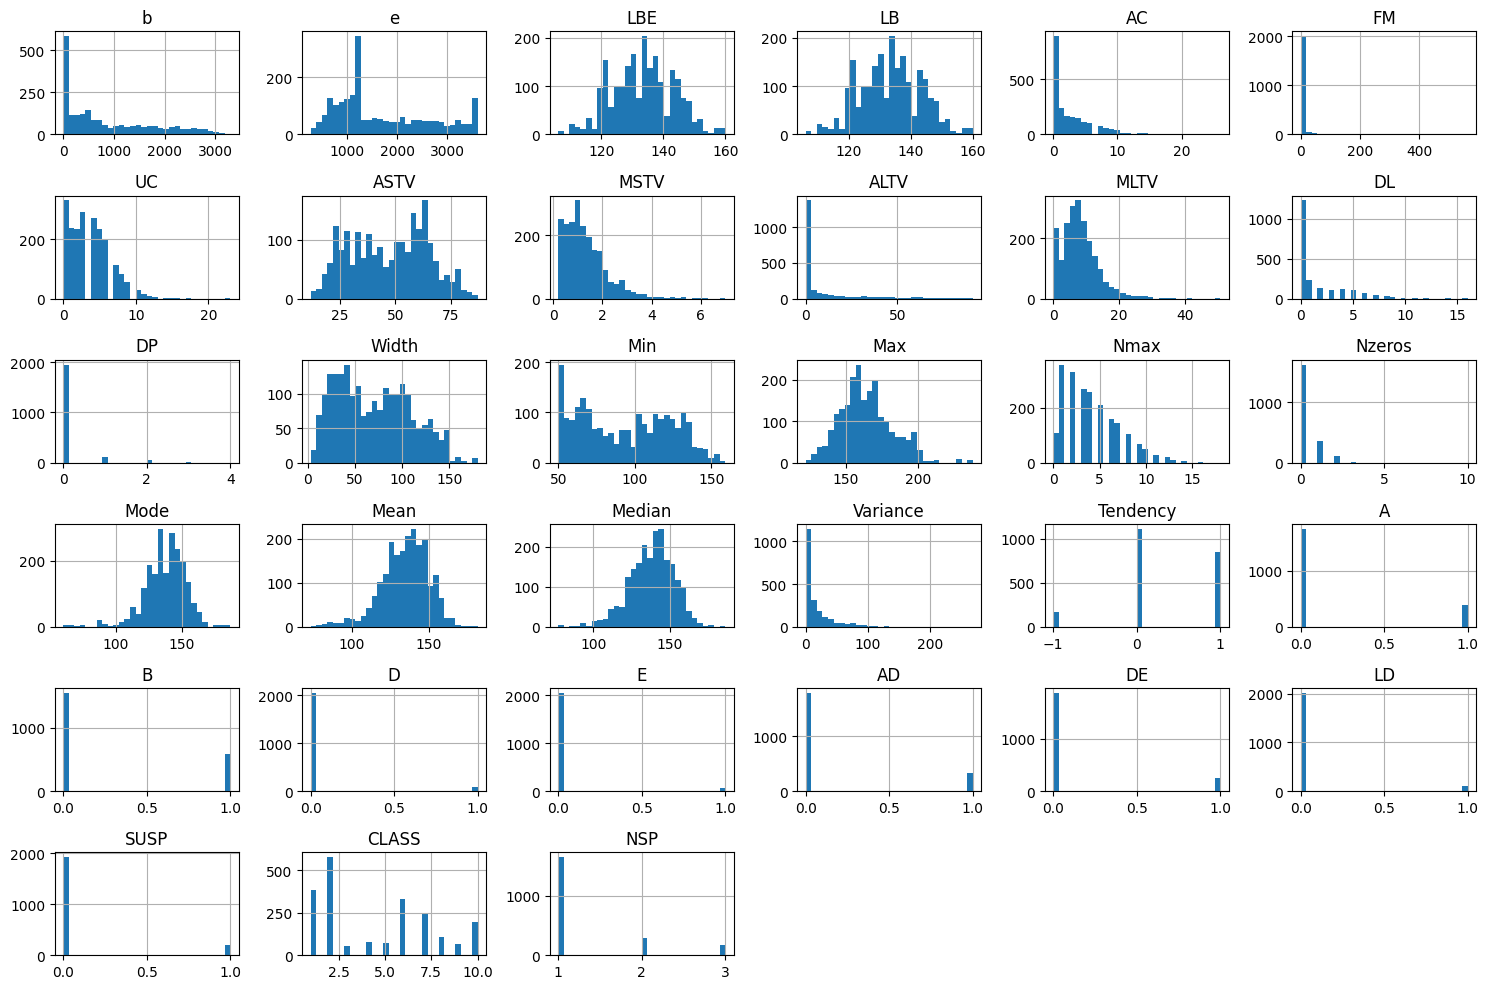

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   FM        2127 non-null   float64
 6   UC        2127 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  DL        2128 non-null   float64
 12  DP        2128 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   floa

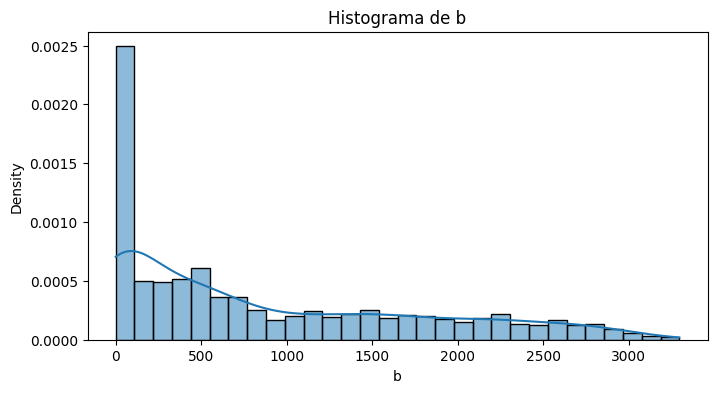

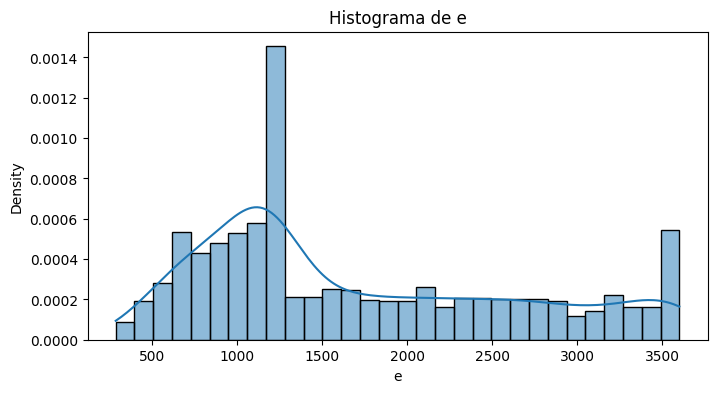

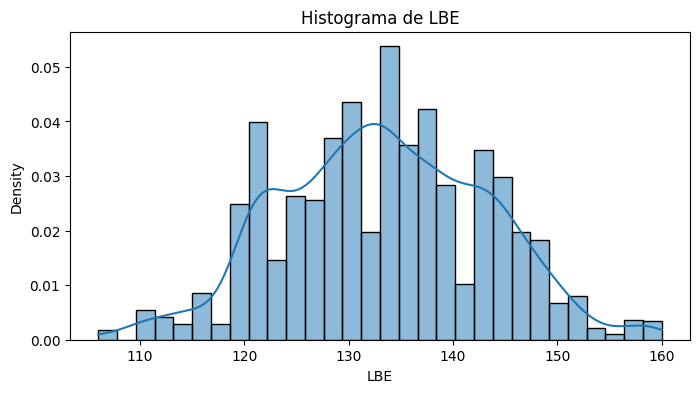

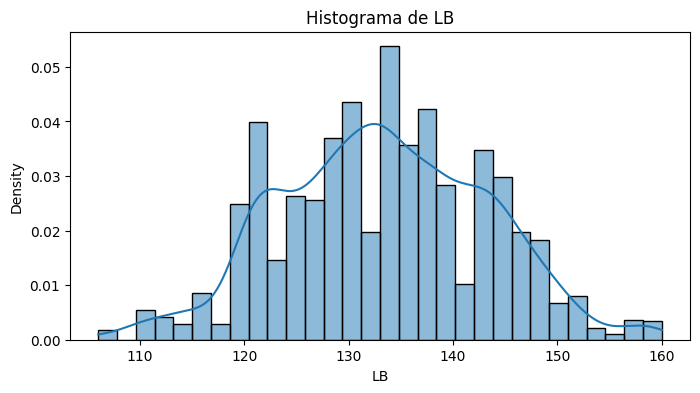

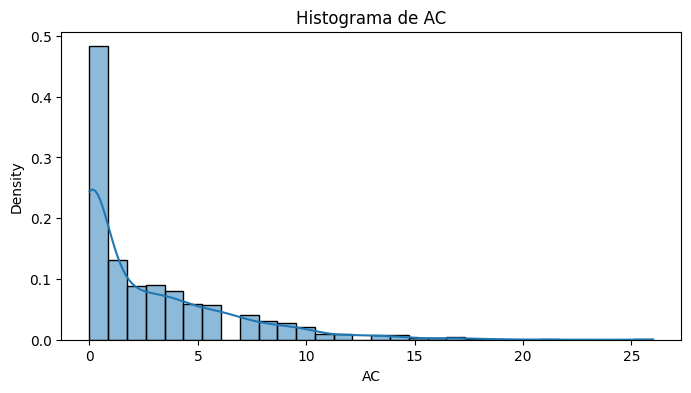

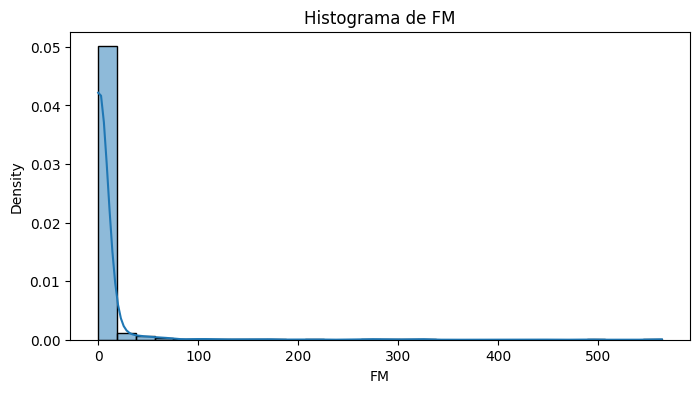

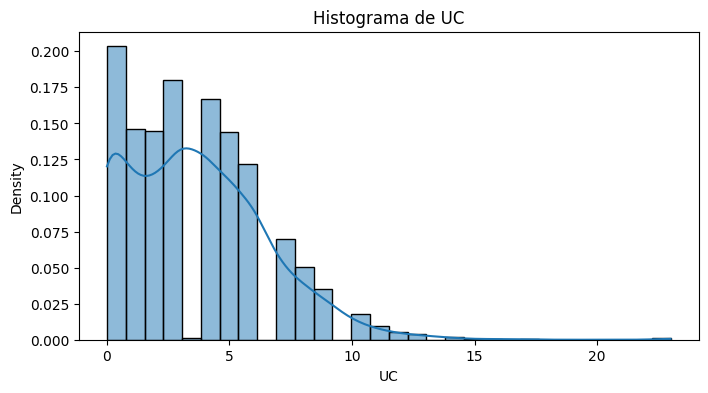

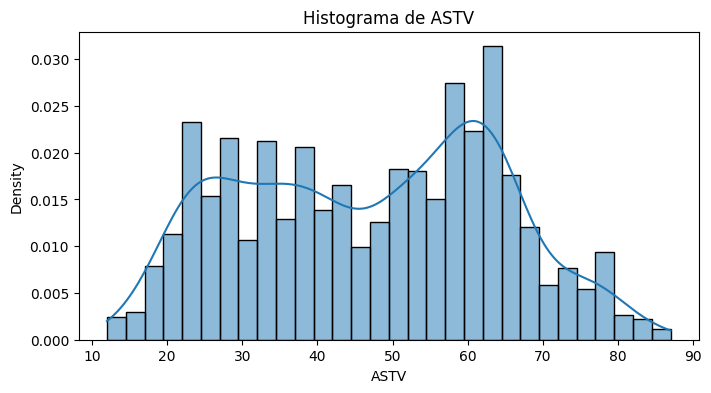

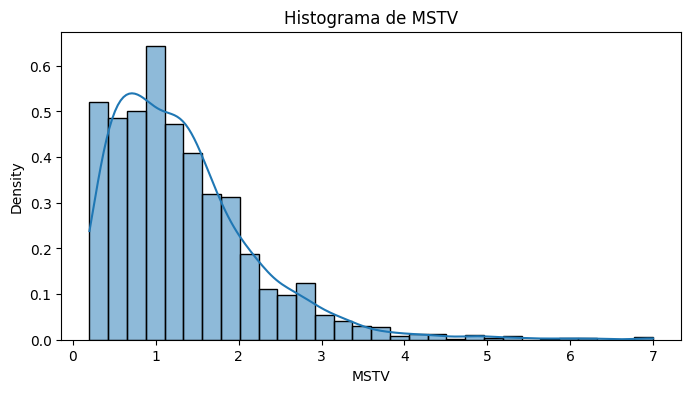

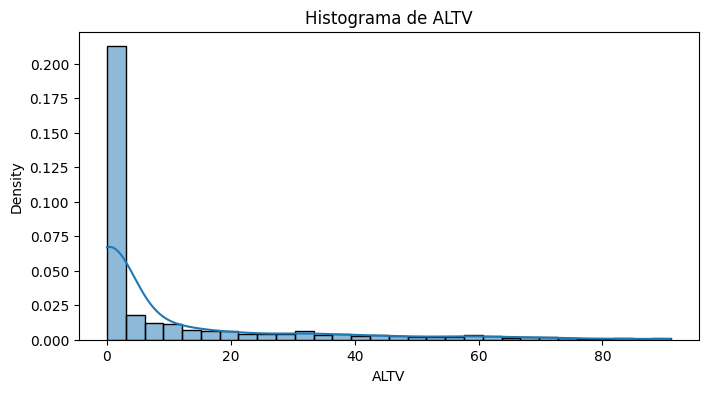

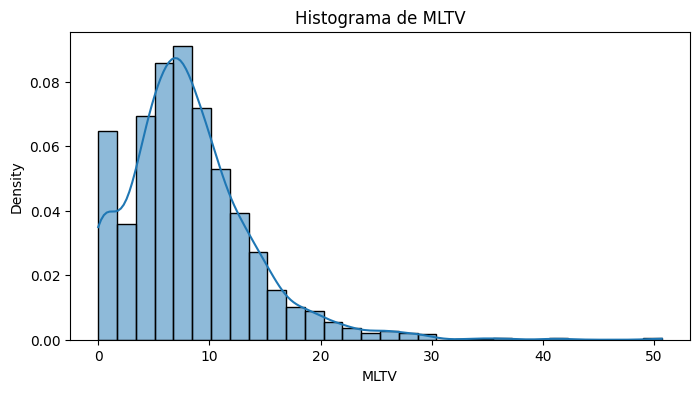

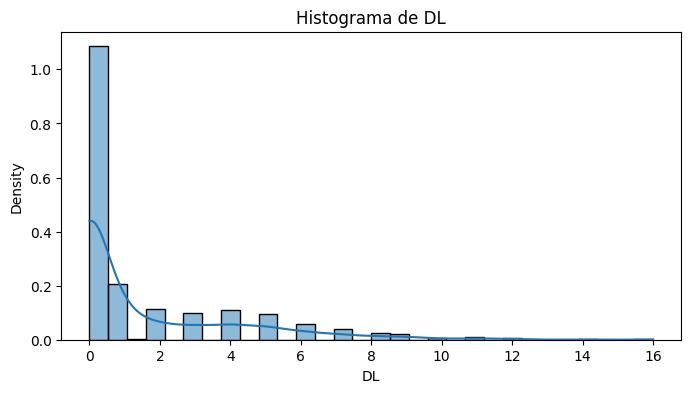

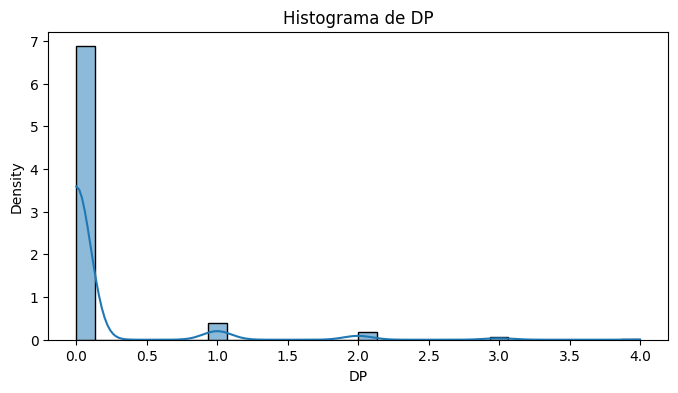

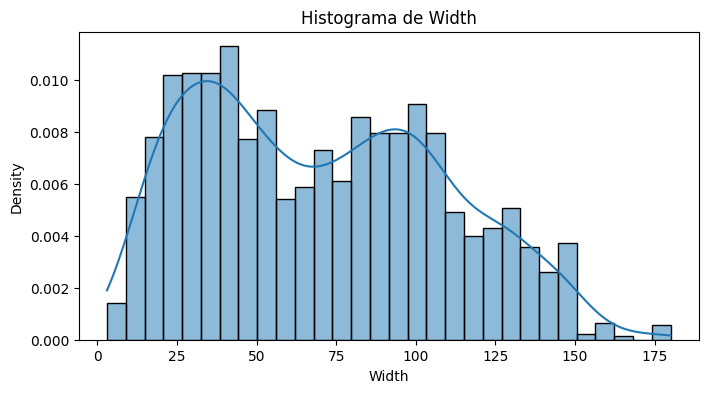

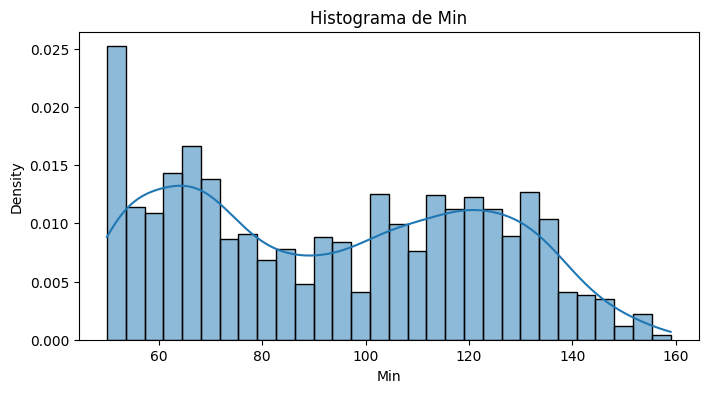

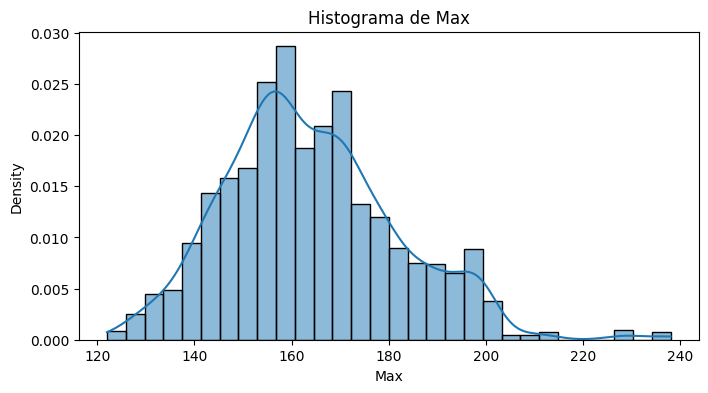

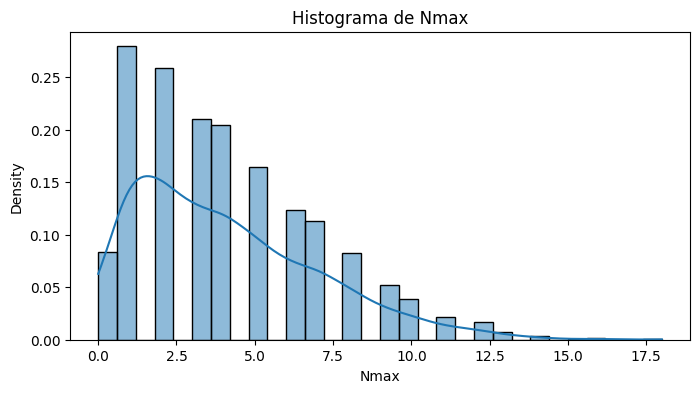

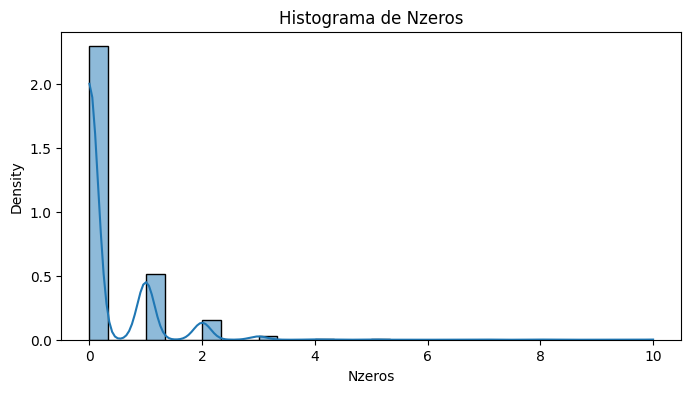

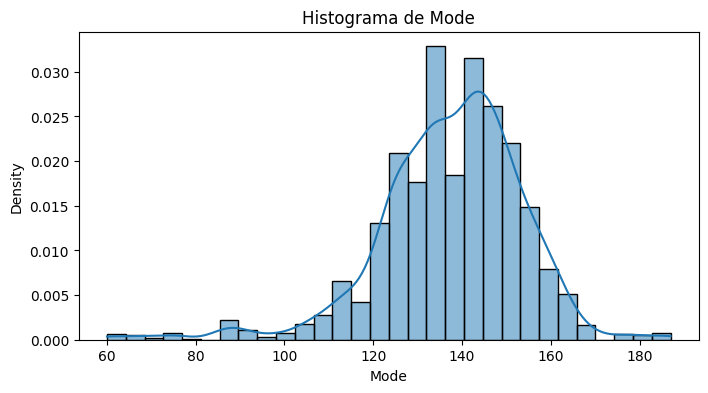

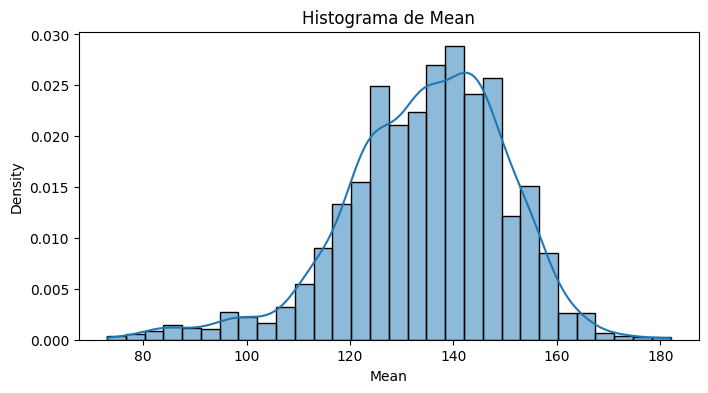

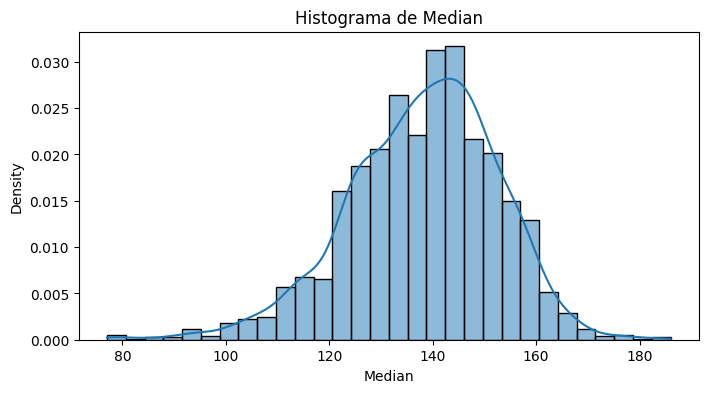

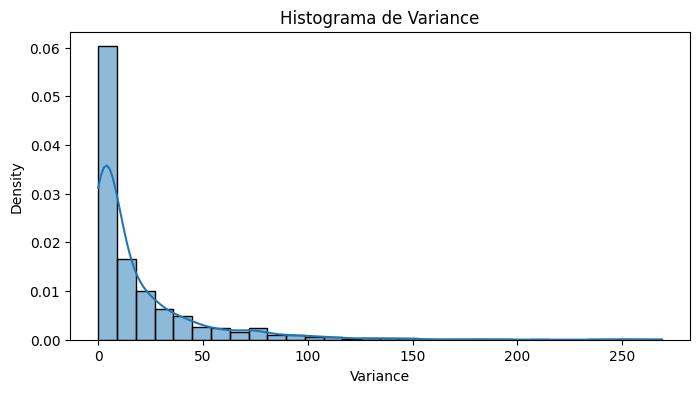

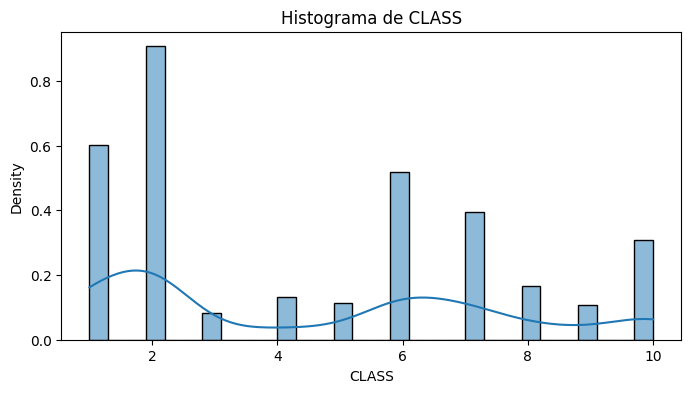

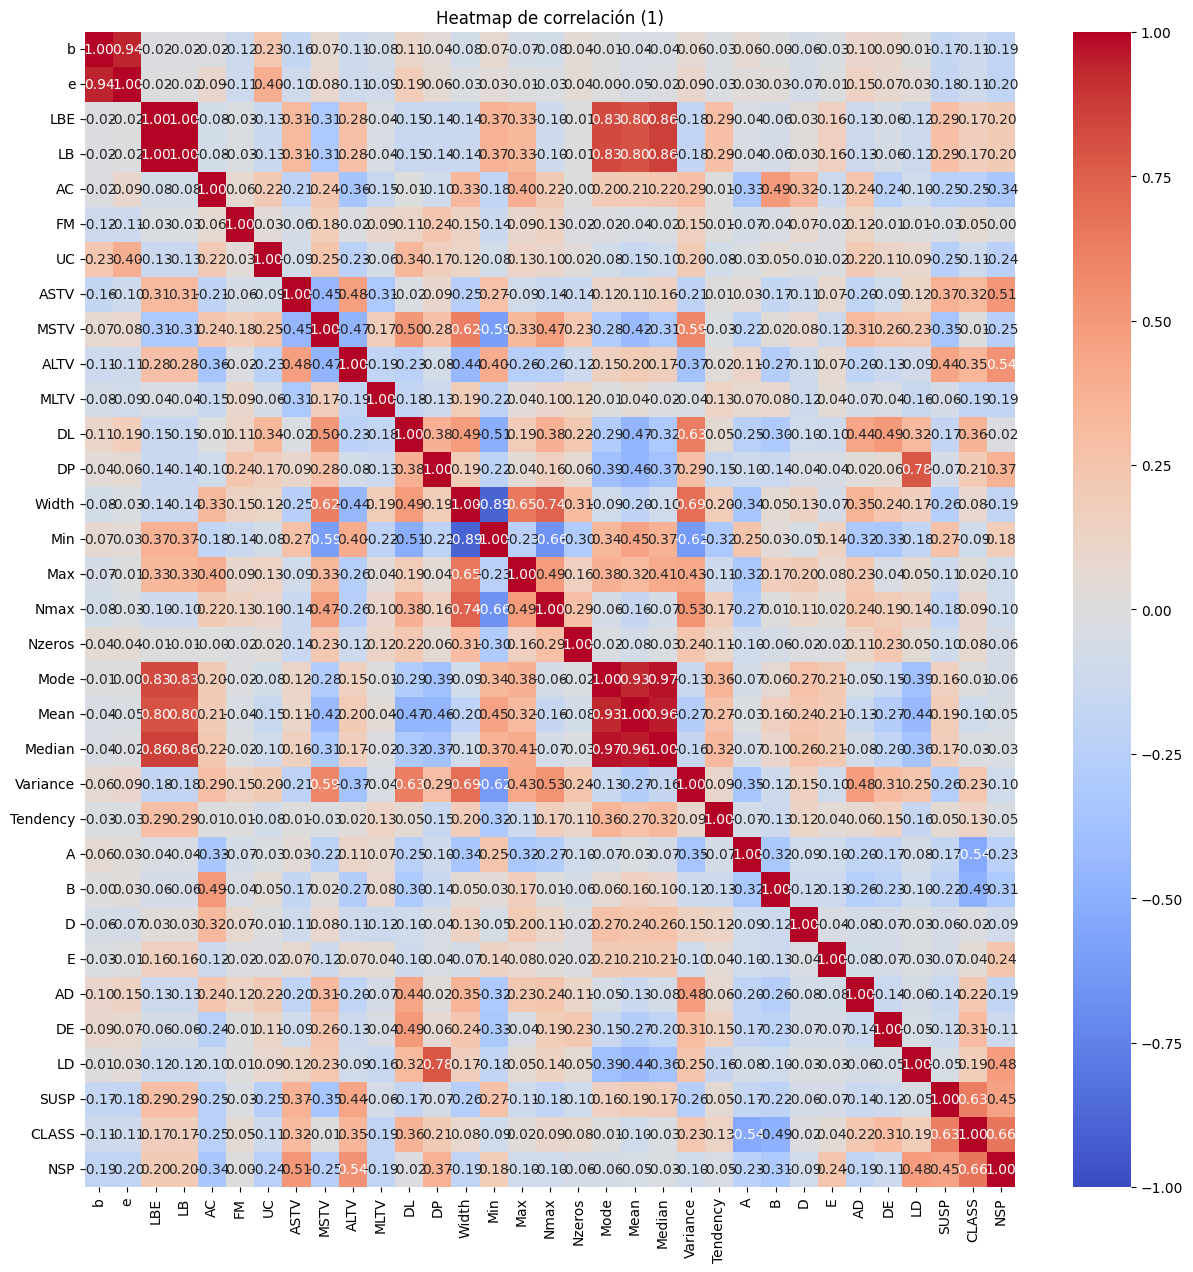

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


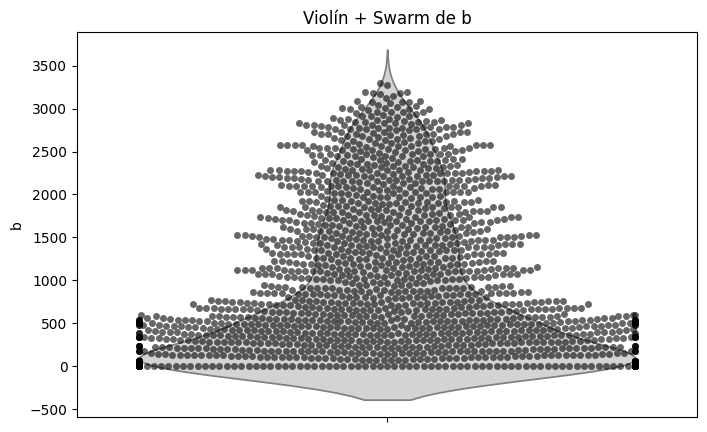

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


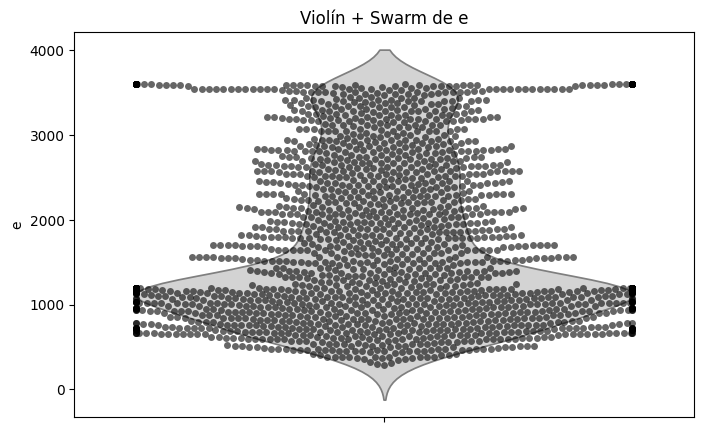

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


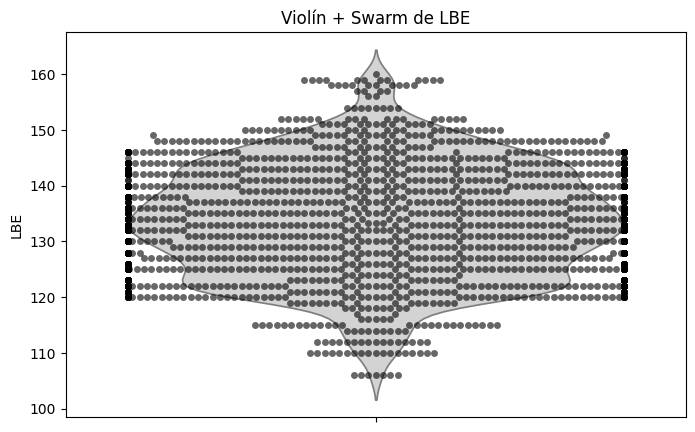

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


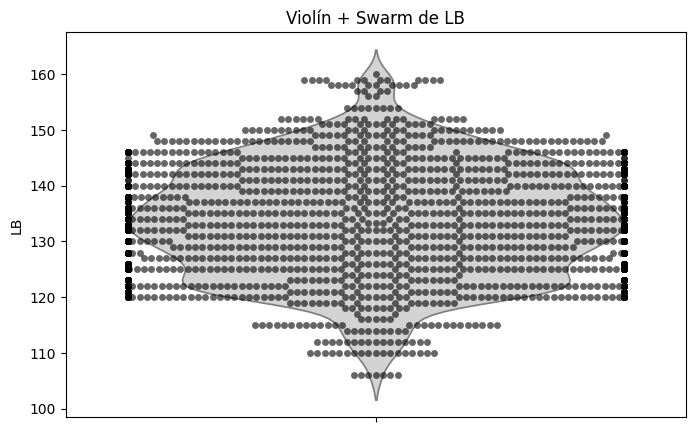

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


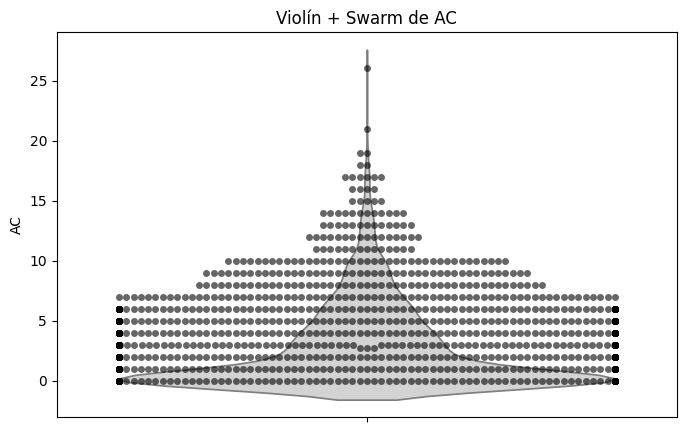

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


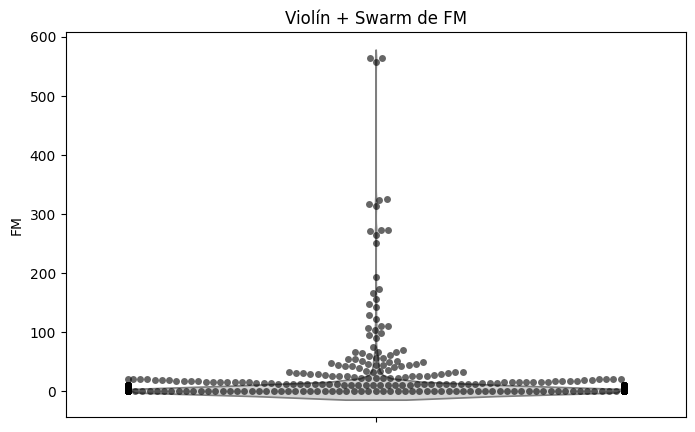

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


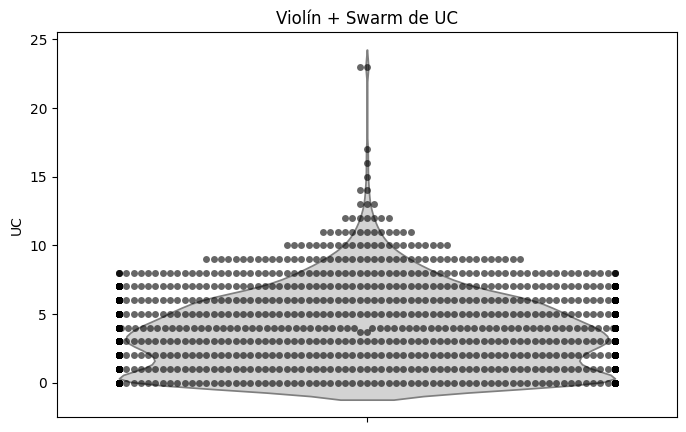

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


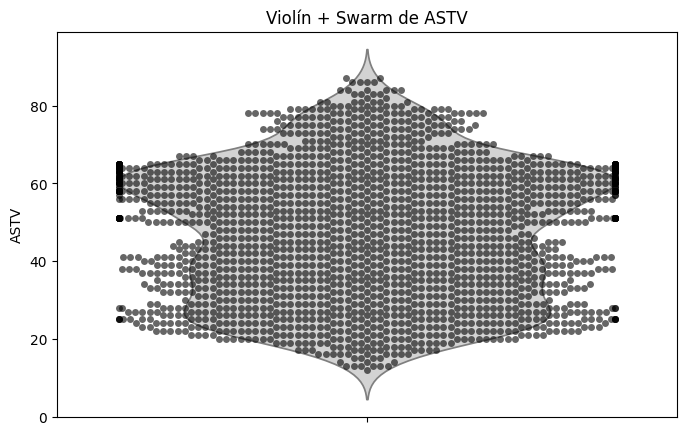

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


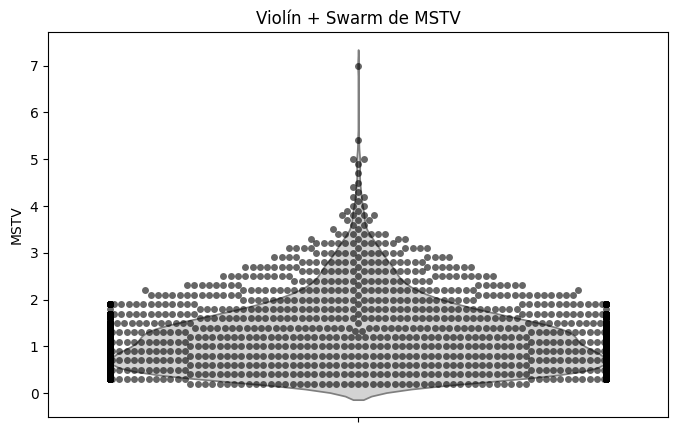

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


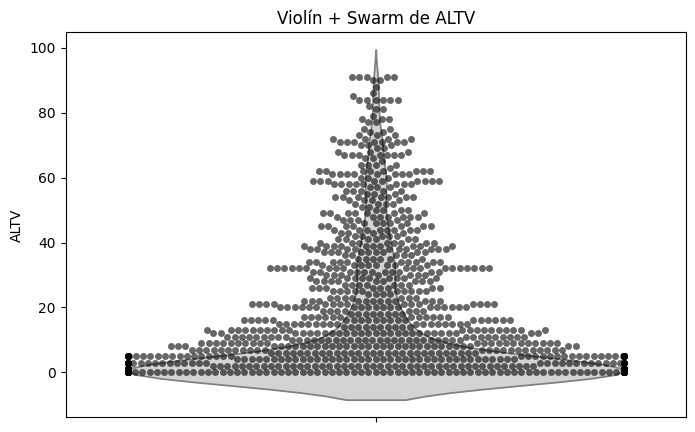

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


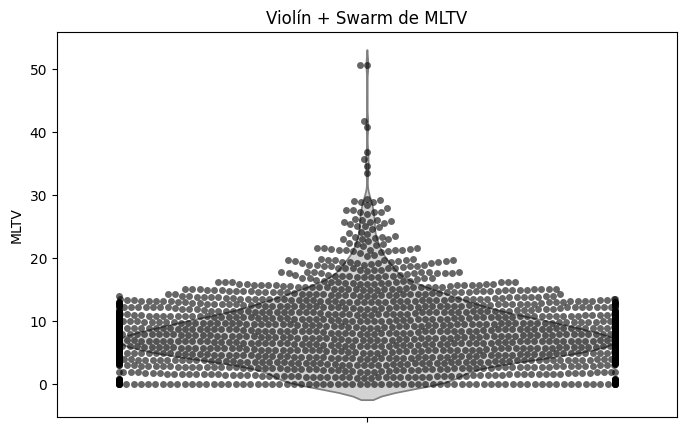

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


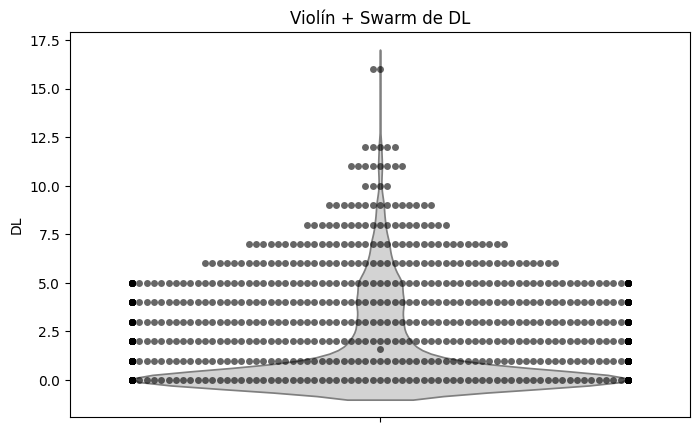

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


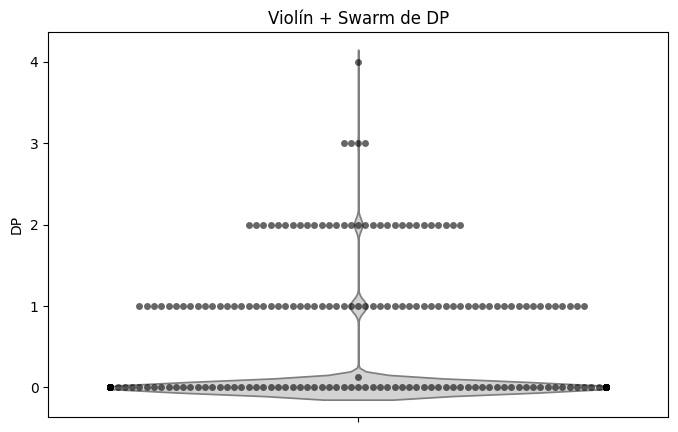

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


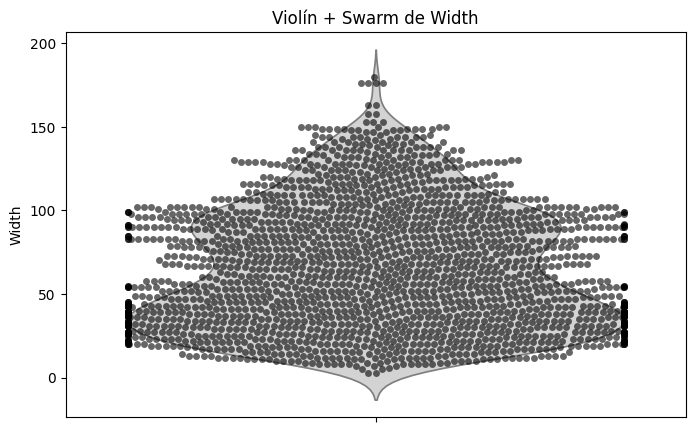

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


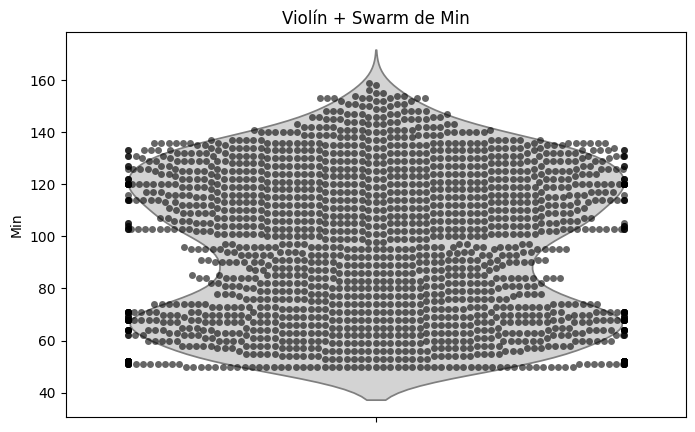

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


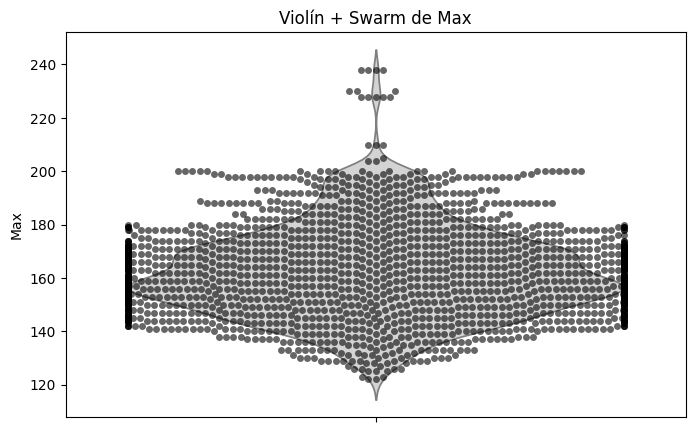

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


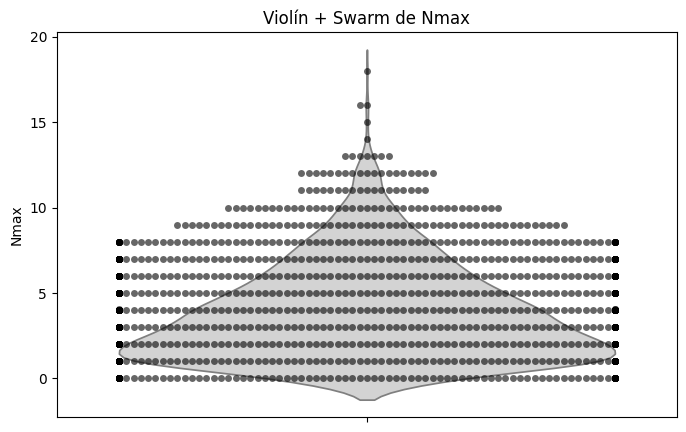

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


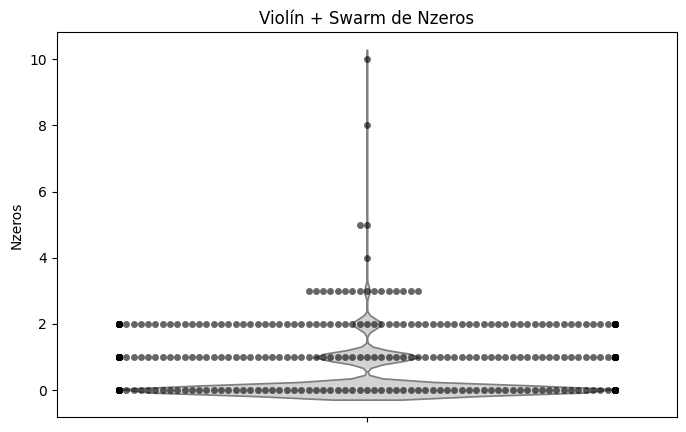

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


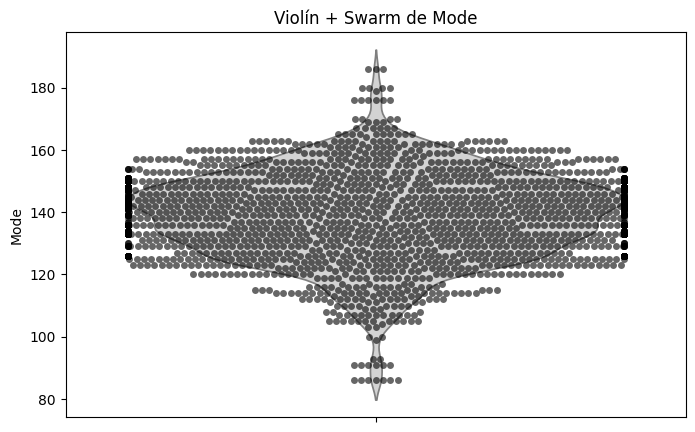

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


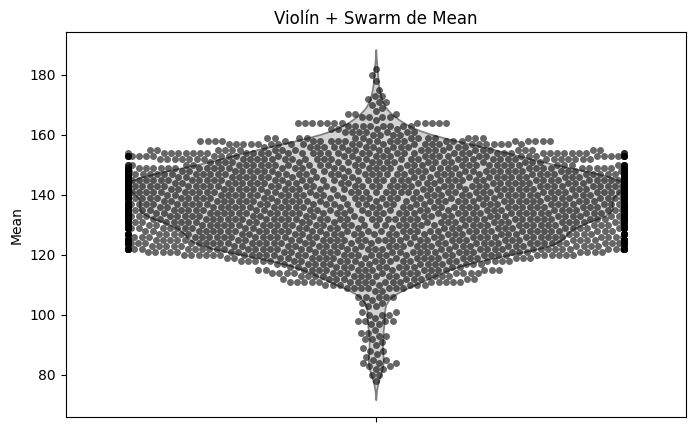

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


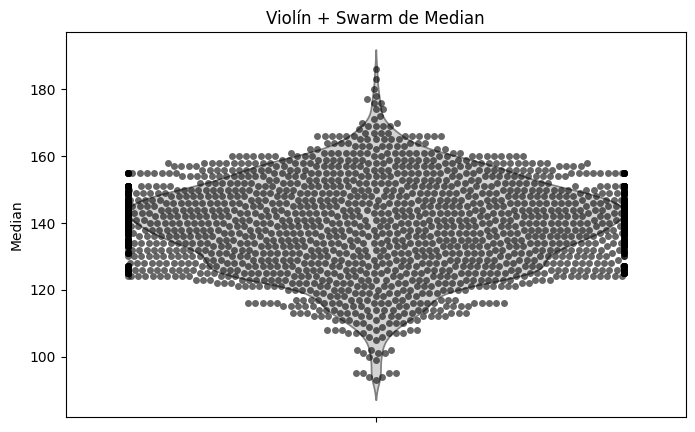

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


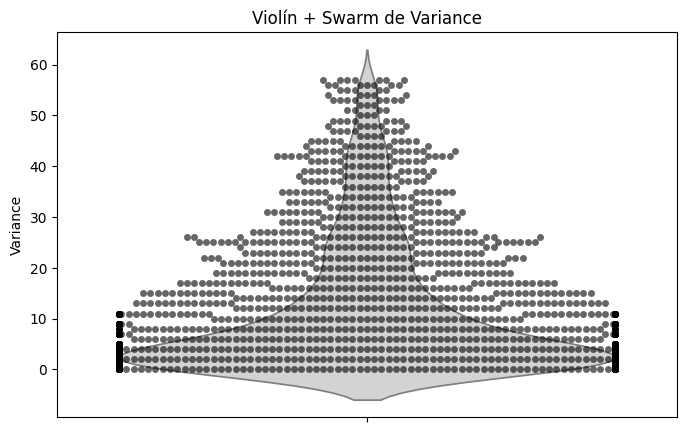

c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\casti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


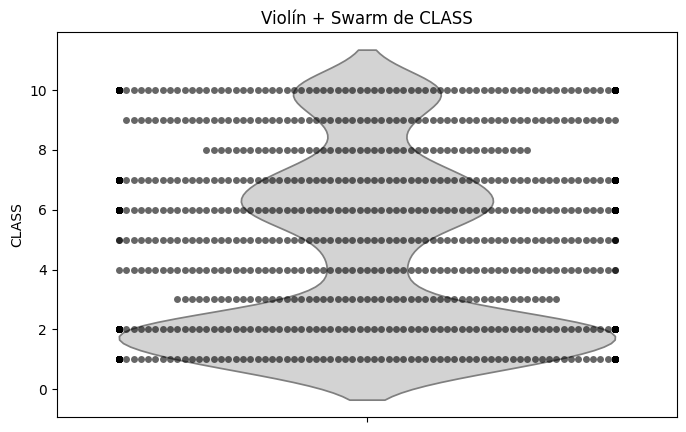

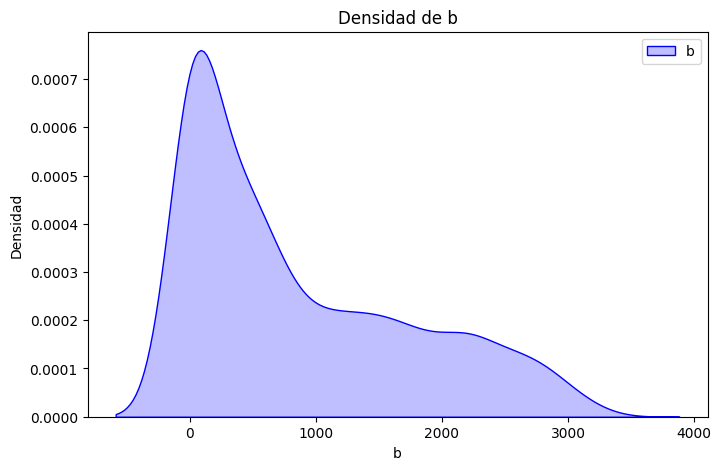

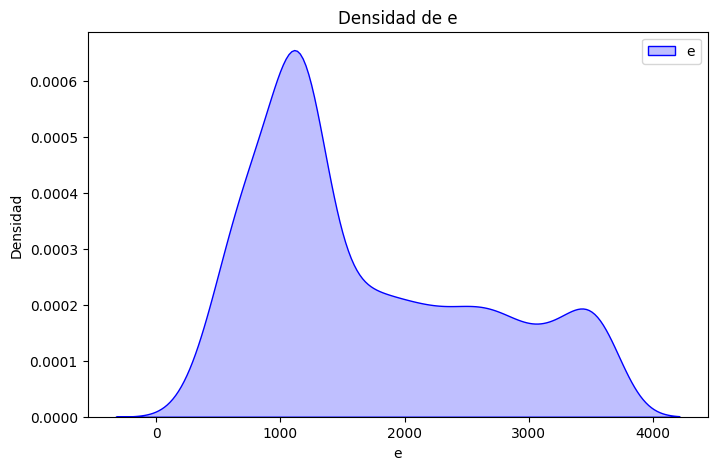

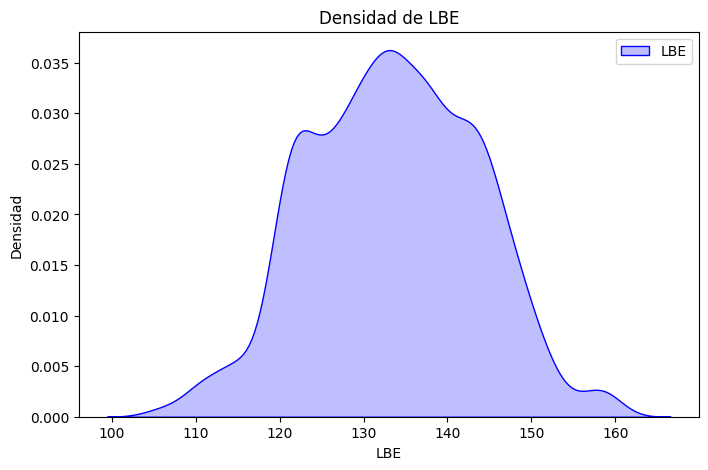

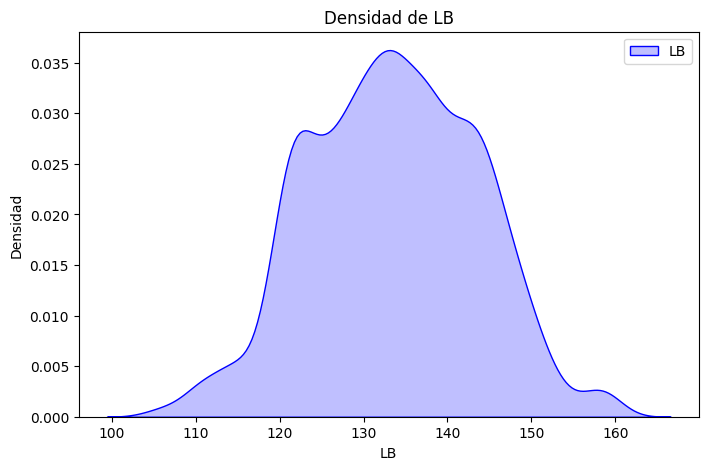

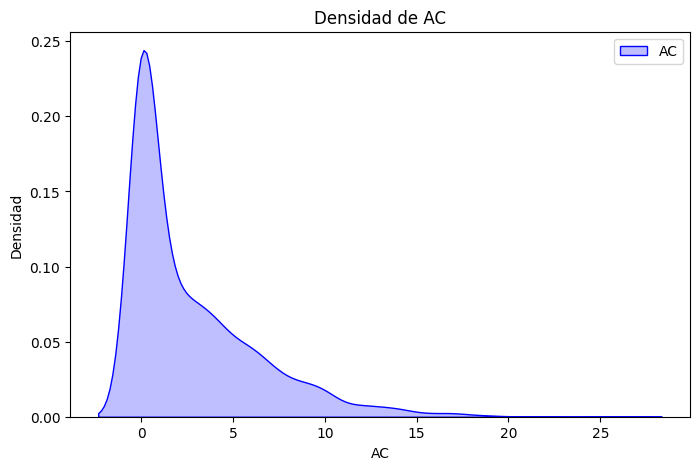

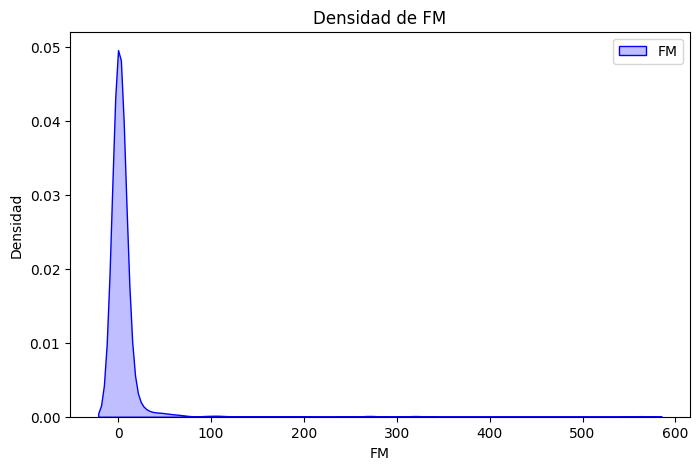

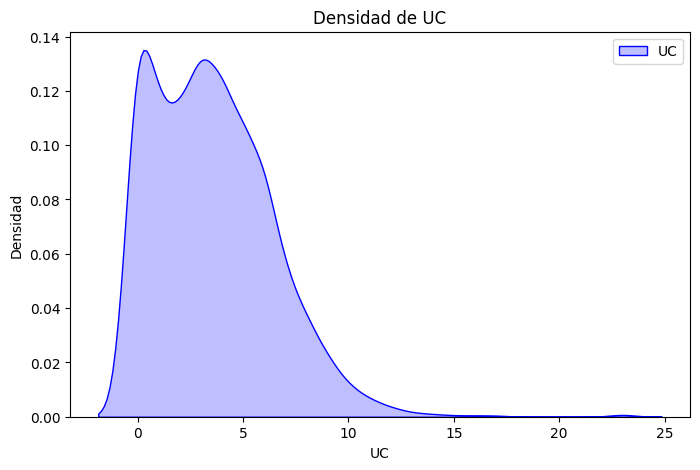

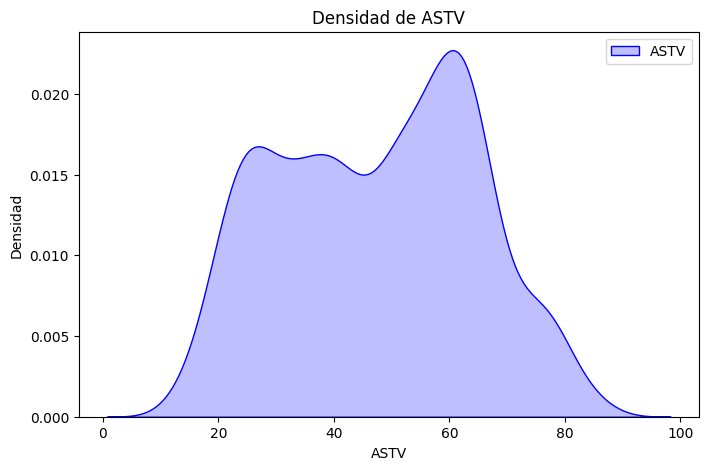

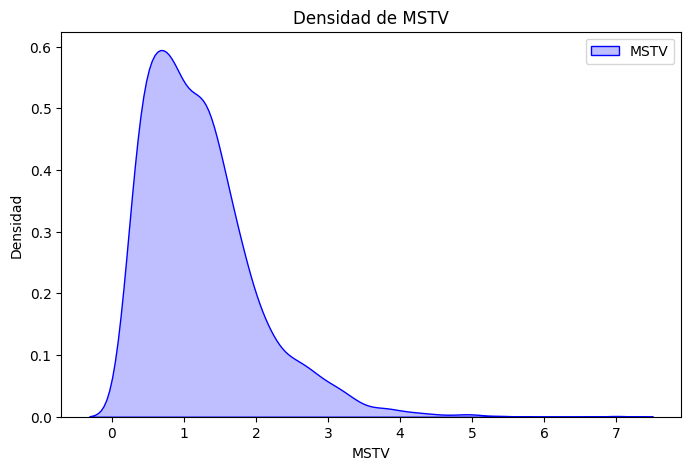

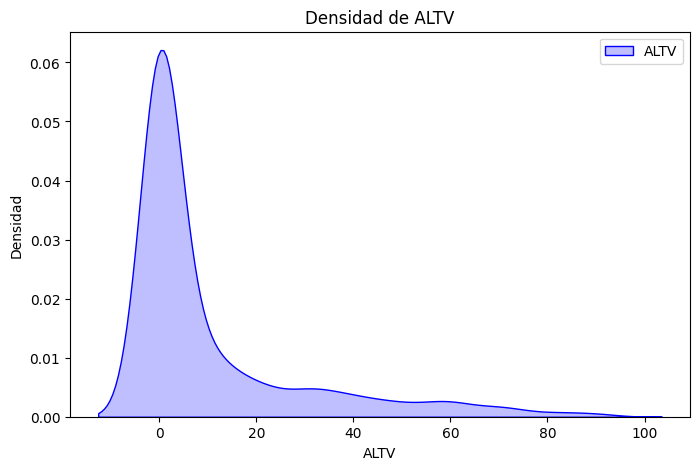

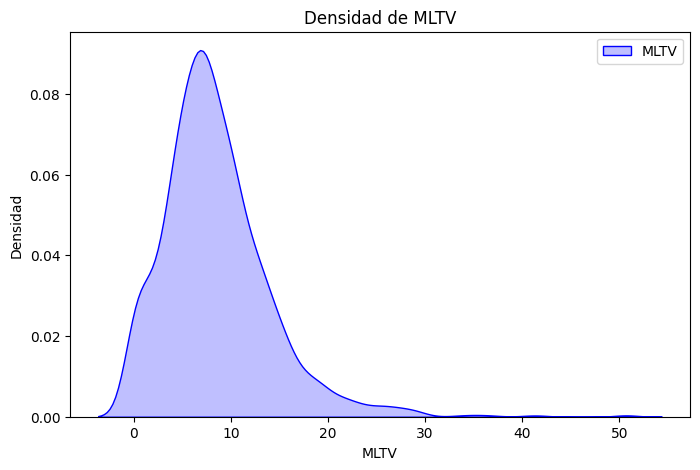

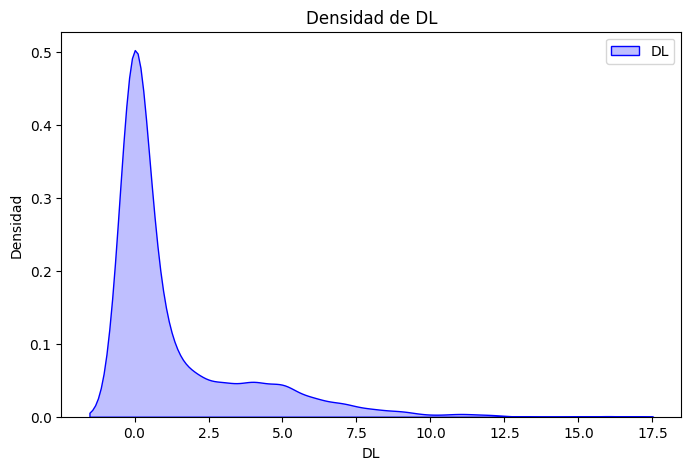

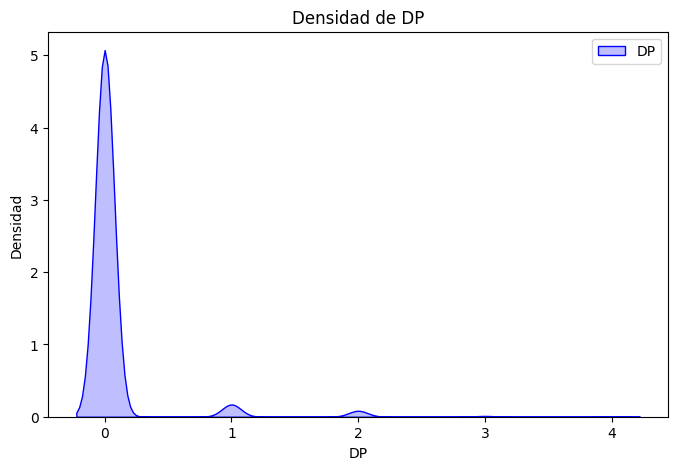

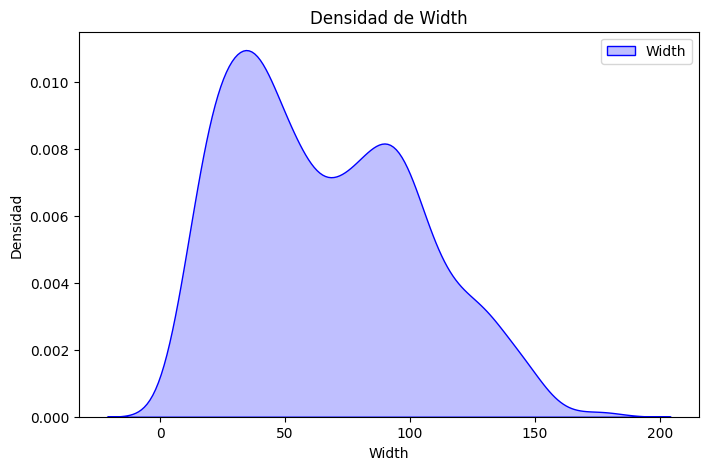

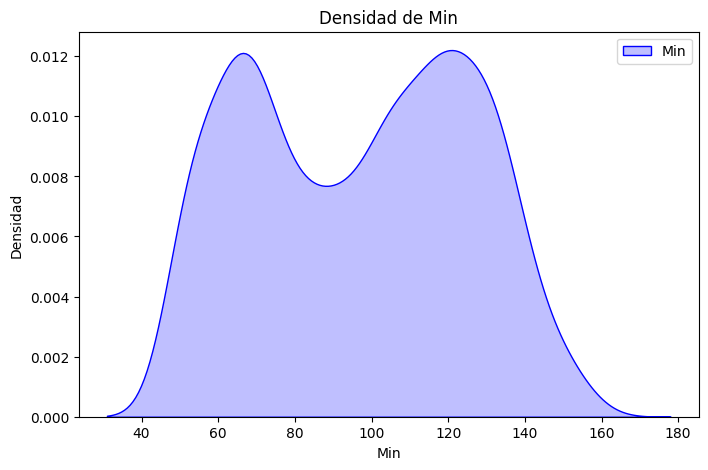

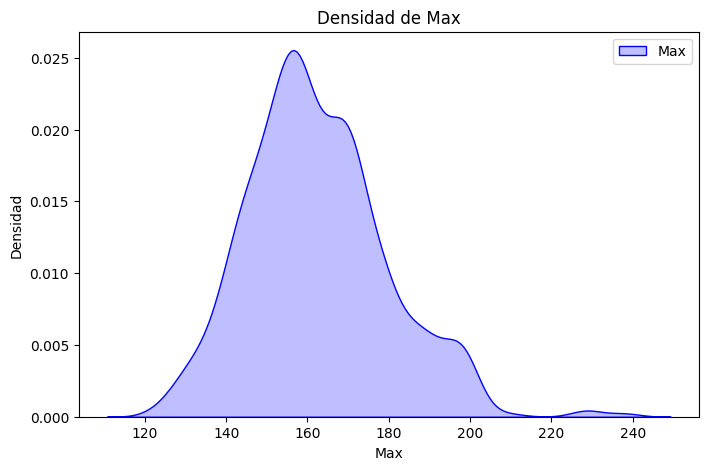

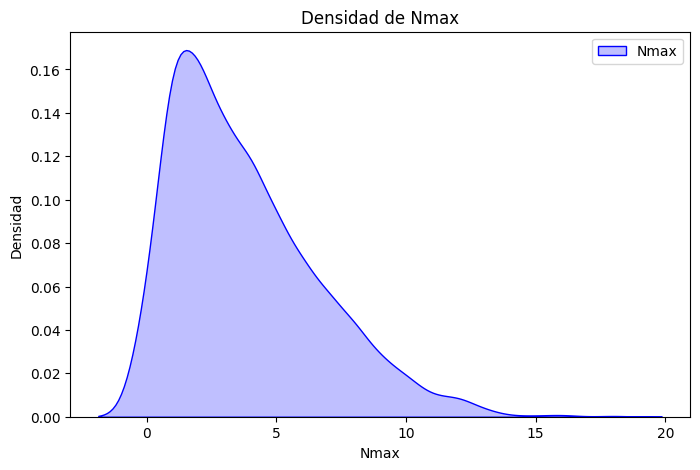

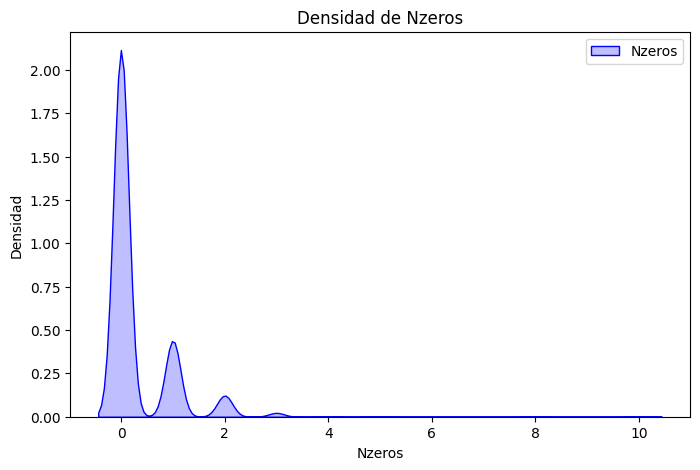

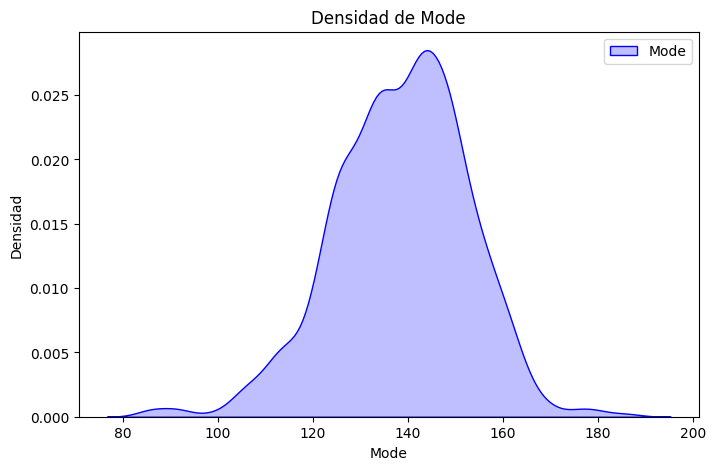

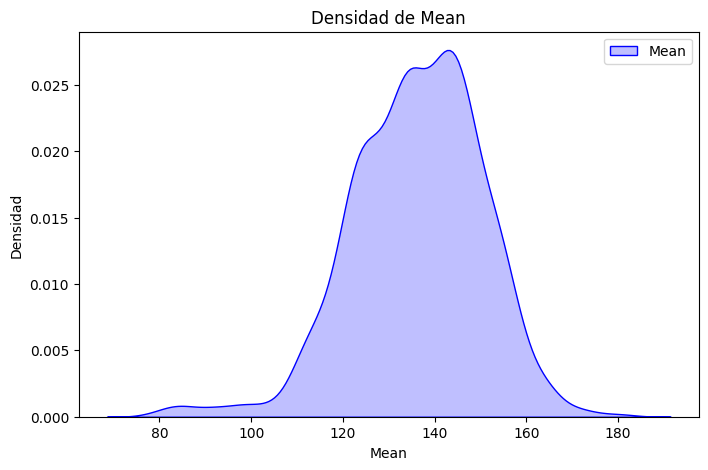

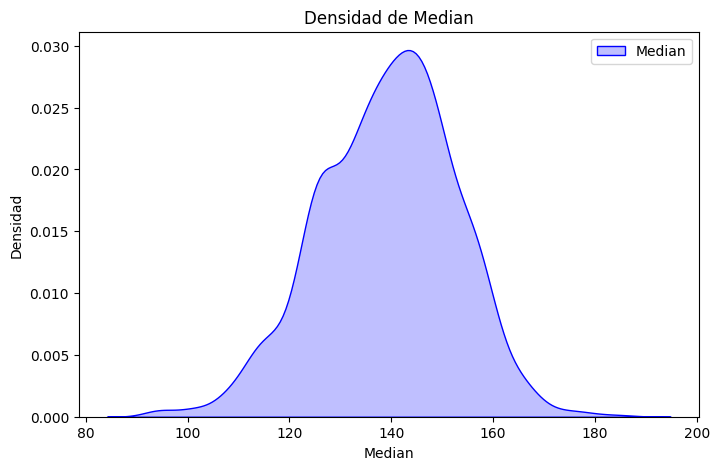

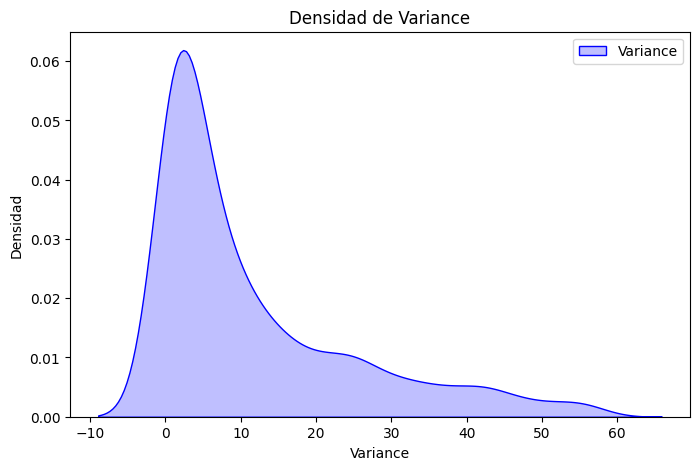

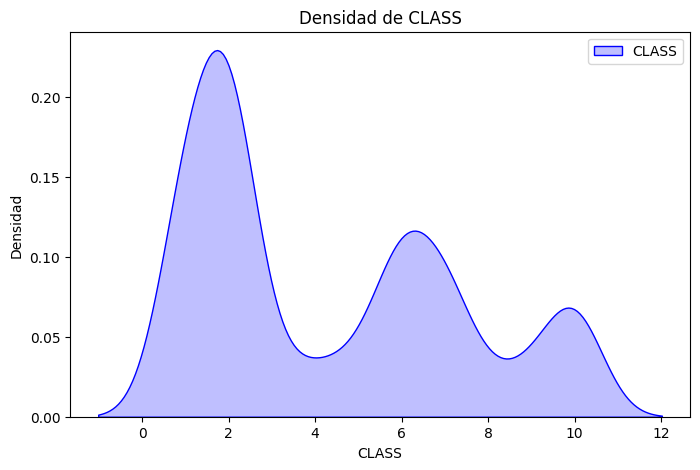

In [7]:


df=P3.practica3.preprocesamiento_datos(r'D:\CV\Diplomado\Archivos\CTG.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1945 entries, 1 to 2128
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         1945 non-null   float64
 1   e         1945 non-null   float64
 2   LBE       1945 non-null   float64
 3   LB        1945 non-null   float64
 4   AC        1945 non-null   float64
 5   FM        1945 non-null   float64
 6   UC        1945 non-null   float64
 7   ASTV      1945 non-null   float64
 8   MSTV      1945 non-null   float64
 9   ALTV      1945 non-null   float64
 10  MLTV      1945 non-null   float64
 11  DL        1945 non-null   float64
 12  DP        1945 non-null   float64
 13  Width     1945 non-null   float64
 14  Min       1945 non-null   float64
 15  Max       1945 non-null   float64
 16  Nmax      1945 non-null   float64
 17  Nzeros    1945 non-null   float64
 18  Mode      1945 non-null   float64
 19  Mean      1945 non-null   float64
 20  Median    1945 non-null   float64
 

In [9]:
df.columns

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'D', 'E', 'AD', 'DE', 'LD',
       'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer


### Separamos el Dataset para aplicar ambos metodos 


media_cols = ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV']
              

mediana_cols = ['DL', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency']

imputer_mean = SimpleImputer(strategy='mean')

df[media_cols] = pd.DataFrame( imputer_mean.fit_transform(df[media_cols]), columns=media_cols,index=df.index )

imputer_median = SimpleImputer(strategy='median')

df[mediana_cols] = pd.DataFrame(imputer_median.fit_transform(df[mediana_cols]),  columns=mediana_cols,index=df.index)


In [11]:
P3.check_data_completeness_nombrecompleto(df)

,num_nulos,completitud_%,dtype,min,max,mean,std,tipo_columna
b,0,100.000000,float64,0.0,3296.0,865.501450,890.359404,Continua
e,0,100.000000,float64,287.0,3599.0,1694.744284,929.204652,Continua
LBE,0,100.000000,float64,106.0,160.0,133.526947,10.008541,Continua
LB,0,100.000000,float64,106.0,160.0,133.526947,10.008541,Continua
AC,0,100.000000,float64,0.0,26.0,2.713197,3.570372,Continua
FM,0,100.000000,float64,0.0,564.0,5.899232,32.398701,Continua
UC,0,100.000000,float64,0.0,23.0,3.563156,2.833882,Continua
ASTV,0,100.000000,float64,12.0,87.0,47.506436,17.122173,Continua
MSTV,0,100.000000,float64,0.2,7.0,1.225795,0.773511,Continua
ALTV,0,100.000000,float64,0.0,91.0,10.692427,19.049568,Continua
